# Laboratorio 1

In [63]:
# Importando librerias necesarias
import cv2 as cv
import numpy as np
import skimage as sk
import skimage.morphology as mo
import skimage.data as data
import skimage.util as util


from utils import two_pass_labeling
from matplotlib import pyplot as plt
from skimage.filters import thresholding as th
from skimage import morphology as mp

## Ejercicio 1

El concepto Hit or Miss tiene como objetivo hallar formas dentro de una imagen identicas a otra predefinida. Se basa en el concepto de erosión, donde la imagen A (imagen donde se desea hallar la figura de la otra imagen) se erosiona con la imagen B (imagen de la estructura predefinida). Posteriormente se erosiona el complemento de A con el complemento de B para encontrar regiones donde el fondo de A coincide con el fondo de B. Una vez encontradas las regiones donde estos casos se encuentra, la operación Hit or Miss se define como la intersección de estos dos resultados.

In [64]:

imagen_binaria = cv.imread('./images/ej1/ej1.png', cv.IMREAD_GRAYSCALE)

_, imagen_binaria = cv.threshold(imagen_binaria, 127, 255, cv.THRESH_BINARY)

elemento_estructurante = np.array([[0, 0, 0, 1, 0, 0, 0],
                                   [0, 1, 1, 1, 1, 1, 0],
                                   [1, 1, 1, 1, 1, 1, 1],
                                   [1, 1, 1, 1, 1, 1, 1],
                                   [1, 1, 1, 1, 1, 1, 1],
                                   [0, 1, 1, 1, 1, 1, 0],
                                   [0, 0, 0, 1, 0, 0, 0]], dtype=np.uint8)

hit_or_miss = cv.morphologyEx(imagen_binaria, cv.MORPH_HITMISS, elemento_estructurante)

cv.imwrite('./images/ej1/Imagen_Original.png', imagen_binaria)
cv.imwrite('./images/ej1/Hit_or_Miss.png', hit_or_miss)

True

## Ejercicio 2

(-0.5, 999.5, 1443.5, -0.5)

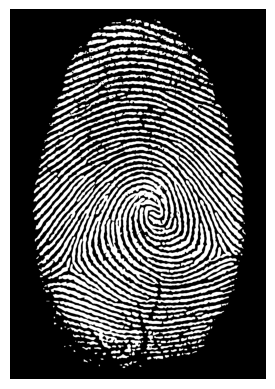

In [65]:
# Cargando imagen
finger_image = cv.imread('images/fingerprint.jpeg', cv.IMREAD_GRAYSCALE)
# Invertir imagen
finger_image = cv.bitwise_not(finger_image)
# Binarizar imagen
_, bin_finger = cv.threshold(finger_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# Mostrar imagen binarizada
plt.imshow(bin_finger, cmap='gray')
plt.axis('off')


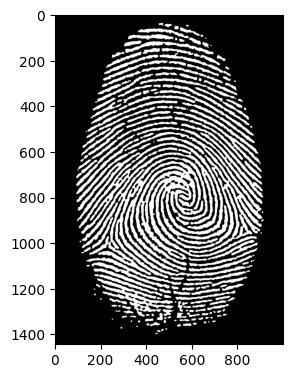

In [66]:

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
# Aplicar un cierre y una apertura para unir los puntos de la huella y eliminar ruido.
closing = cv.morphologyEx(bin_finger, cv.MORPH_CLOSE, kernel, iterations=2)
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel, iterations=2)


plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(opening, cmap='gray')

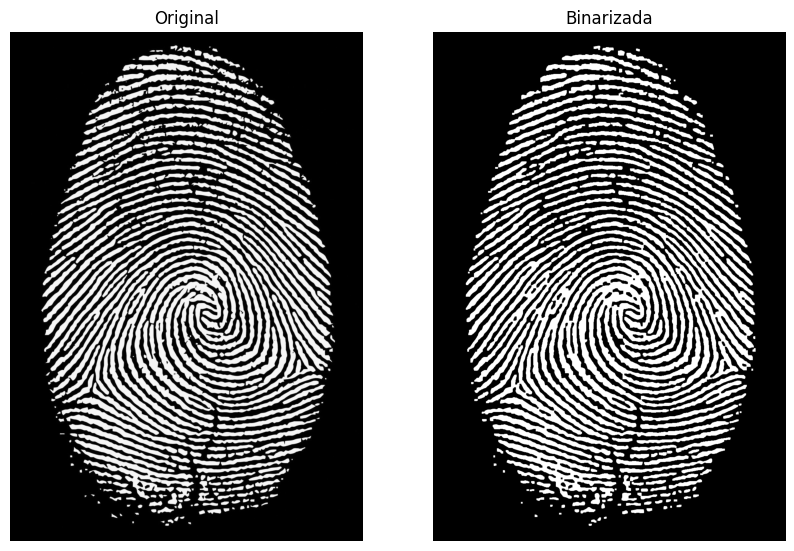

In [67]:
# Mostrar ambas imagenes side by side
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(finger_image, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(122)
plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.title('Binarizada')
plt.show()


## Ejercicio 3

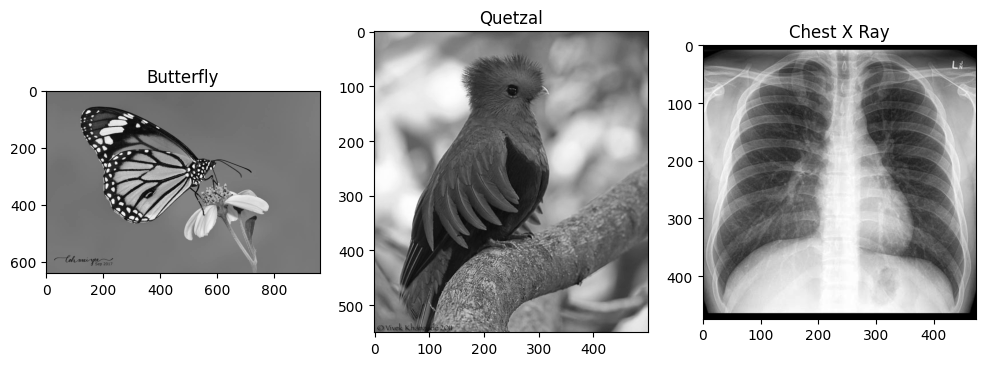

In [68]:
image1 = cv.imread('images/butterfly.jpeg', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('images/quetzalgris.png', cv.IMREAD_GRAYSCALE)
image3 = cv.imread('images/chestXray.jpeg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(image1, cmap='gray')
plt.title('Butterfly')

plt.subplot(132)
plt.imshow(image2, cmap='gray')
plt.title('Quetzal')

plt.subplot(133)
plt.imshow(image3, cmap='gray')
plt.title('Chest X Ray')

plt.show()

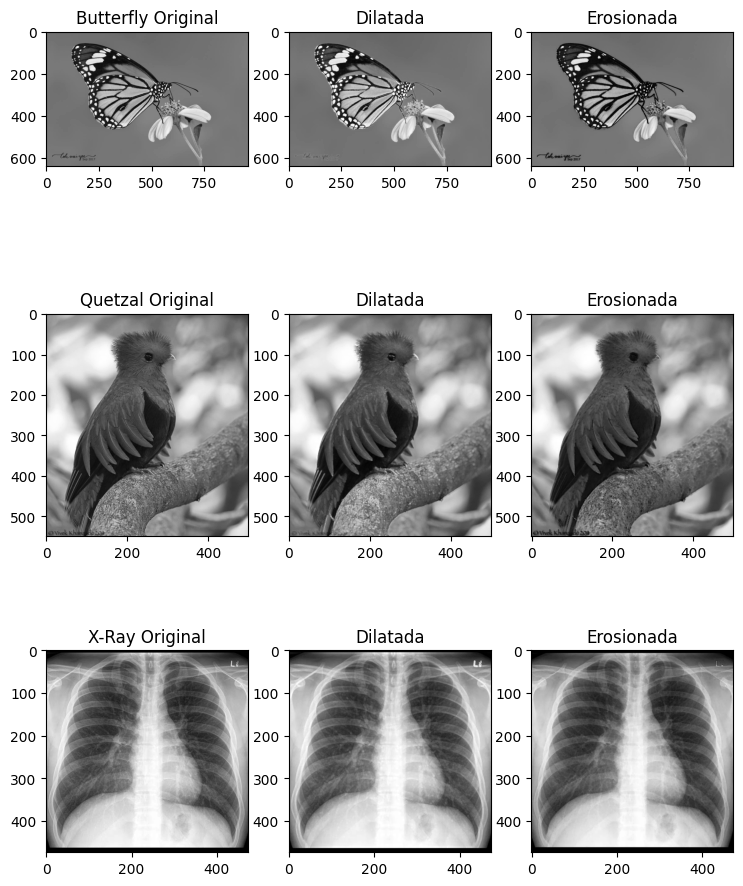

In [69]:
#Aplicar dilatación y erosión a las imagenes.
plt.figure(figsize=(12, 12))

plt.subplot(3, 4, 1)
plt.imshow(image1, cmap='gray')
plt.title('Butterfly Original')

plt.subplot(3, 4, 2)
plt.imshow(mo.dilation(image1), cmap='gray')
plt.title('Dilatada')

plt.subplot(3, 4, 3)
plt.imshow(mo.erosion(image1), cmap='gray')
plt.title('Erosionada')

plt.subplot(3, 4, 5)
plt.imshow(image2, cmap='gray')
plt.title('Quetzal Original')

plt.subplot(3, 4, 6)
plt.imshow(mo.dilation(image2), cmap='gray')
plt.title('Dilatada')

plt.subplot(3, 4, 7)
plt.imshow(mo.erosion(image2), cmap='gray')
plt.title('Erosionada')

plt.subplot(3, 4, 9)
plt.imshow(image3, cmap='gray')
plt.title('X-Ray Original')

plt.subplot(3, 4, 10)
plt.imshow(mo.dilation(image3), cmap='gray')
plt.title('Dilatada')

plt.subplot(3, 4, 11)
plt.imshow(mo.erosion(image3), cmap='gray')
plt.title('Erosionada')

plt.show()


El cambio más grande que se encuentra es con las imagenes erosionadas 1 y 2. Al tratar con la erosión tiende a reducir el tamaño de los objetos y eliminar detalles finos, mientras que la dilatación aumenta el tamaño de los objetos y rellenar huecos (El ojo del quetzal). Prácticamente es de bastante utilidad al ser eliminación de ruido, como se puede ver más en la imagen erosionada de los X-Ray, o en las alas de la mariposa.

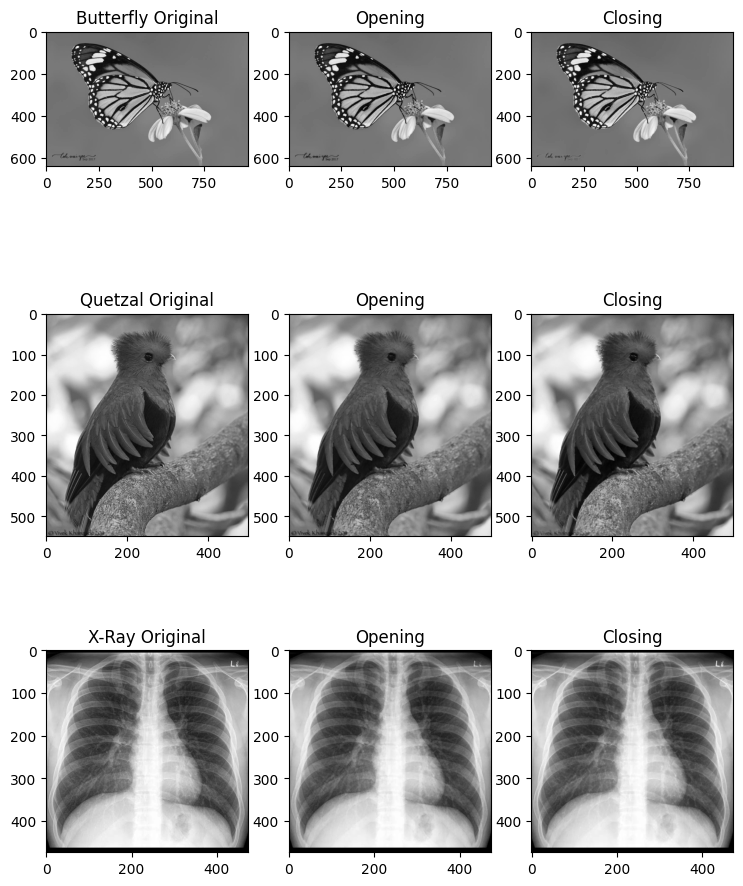

In [70]:
#Aplicar dilatación y erosión a las imagenes.
plt.figure(figsize=(12, 12))

plt.subplot(3, 4, 1)
plt.imshow(image1, cmap='gray')
plt.title('Butterfly Original')

plt.subplot(3, 4, 2)
plt.imshow(mo.opening(image1), cmap='gray')
plt.title('Opening')

plt.subplot(3, 4, 3)
plt.imshow(mo.closing(image1), cmap='gray')
plt.title('Closing')

plt.subplot(3, 4, 5)
plt.imshow(image2, cmap='gray')
plt.title('Quetzal Original')

plt.subplot(3, 4, 6)
plt.imshow(mo.opening(image2), cmap='gray')
plt.title('Opening')

plt.subplot(3, 4, 7)
plt.imshow(mo.closing(image2), cmap='gray')
plt.title('Closing')

plt.subplot(3, 4, 9)
plt.imshow(image3, cmap='gray')
plt.title('X-Ray Original')

plt.subplot(3, 4, 10)
plt.imshow(mo.opening(image3), cmap='gray')
plt.title('Opening')

plt.subplot(3, 4, 11)
plt.imshow(mo.closing(image3), cmap='gray')
plt.title('Closing')

plt.show()

Acá puede ser un poco más difícil notar los cambios. En el caso del opening suele suavizar los contornos y eliminar pequeños detalles de las imagenes, mientras que el closing tiende a cerrar los huecos pequeños y unir regiones cercanas. Los cambios se pueden notar como en el cuerpo de la mariposa, donde el closing hizo que los puntos blancos quedaron más grandes que el original, o incluso en el pelo de la cabeza del quetzal que quedó más definido.

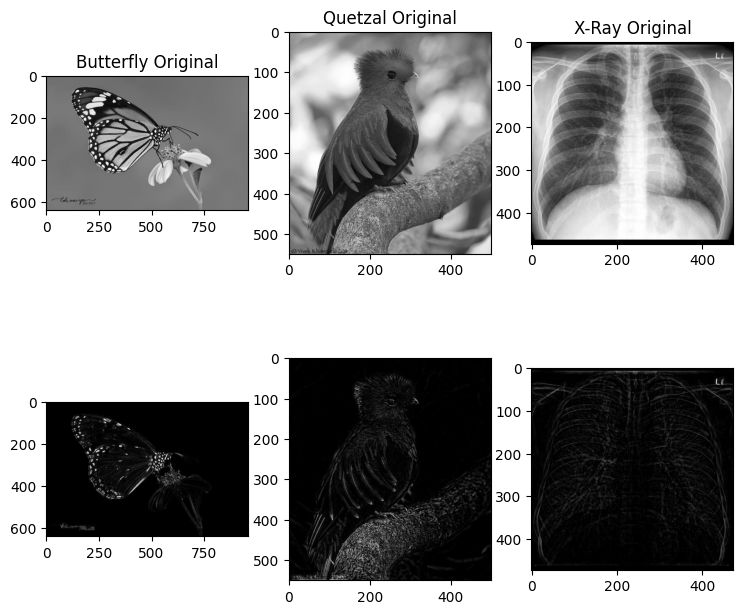

In [71]:
#Aplicar dilatación y erosión a las imagenes.
plt.figure(figsize=(12, 12))

plt.subplot(3, 4, 1)
plt.imshow(image1, cmap='gray')
plt.title('Butterfly Original')

plt.subplot(3, 4, 5)
plt.imshow(mo.white_tophat(image1, mo.disk(5)), cmap='gray')

plt.subplot(3, 4, 2)
plt.imshow(image2, cmap='gray')
plt.title('Quetzal Original')

plt.subplot(3, 4, 6)
plt.imshow(mo.white_tophat(image2, mo.disk(5)), cmap='gray')

plt.subplot(3, 4, 3)
plt.imshow(image3, cmap='gray')
plt.title('X-Ray Original')

plt.subplot(3, 4, 7)
plt.imshow(mo.white_tophat(image3, mo.disk(5)), cmap='gray')

plt.show()

El qué hace el white top-hat, se responde viendo lo que se hizo antes de closing. Al hacer un closing a la imagen original, se hace una resta del resultante con la imagen original. Esto hace que se resalten las partes de la imagen que son más brillantes que su entorno, media vez sean igualmente más pequeñas que el elemento estructurante que se utiliza.

Tras implementar el "White top-hat" se puede notar que es útil cuando se quiere resaltar y analizar las características más pequeñas y brillantes de una imagen en escala de grises en relación con su entorno.

## Ejercicio 4

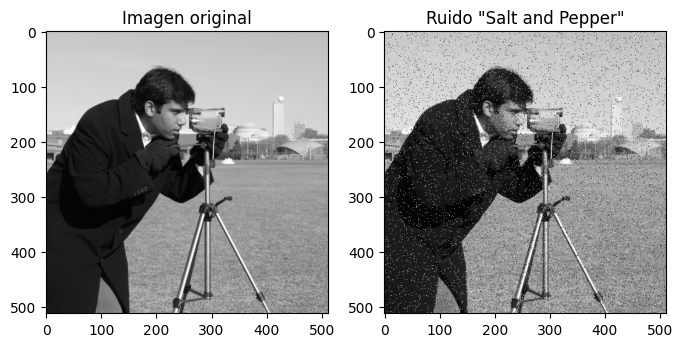

In [72]:
el_estruct = [
    mo.disk(1),
    mo.disk(2),
    mo.disk(3),
    mo.square(1),
    mo.square(2),
    mo.square(3),
    mo.diamond(1),
    mo.diamond(2),
    mo.diamond(3)
]

# Generar una imagen con ruido "salt and pepper"
original_image = util.random_noise(data.camera(), mode='s&p', amount=0.05)

# Mostrar la imagen original
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(data.camera(), cmap='gray')
plt.title('Imagen original')

# Mostrar la imagen con ruido
plt.subplot(1, 2, 2)
plt.imshow(original_image, cmap='gray')
plt.title('Ruido "Salt and Pepper"')

plt.show()

Text(0.5, 1.0, 'Diamante rad=3')

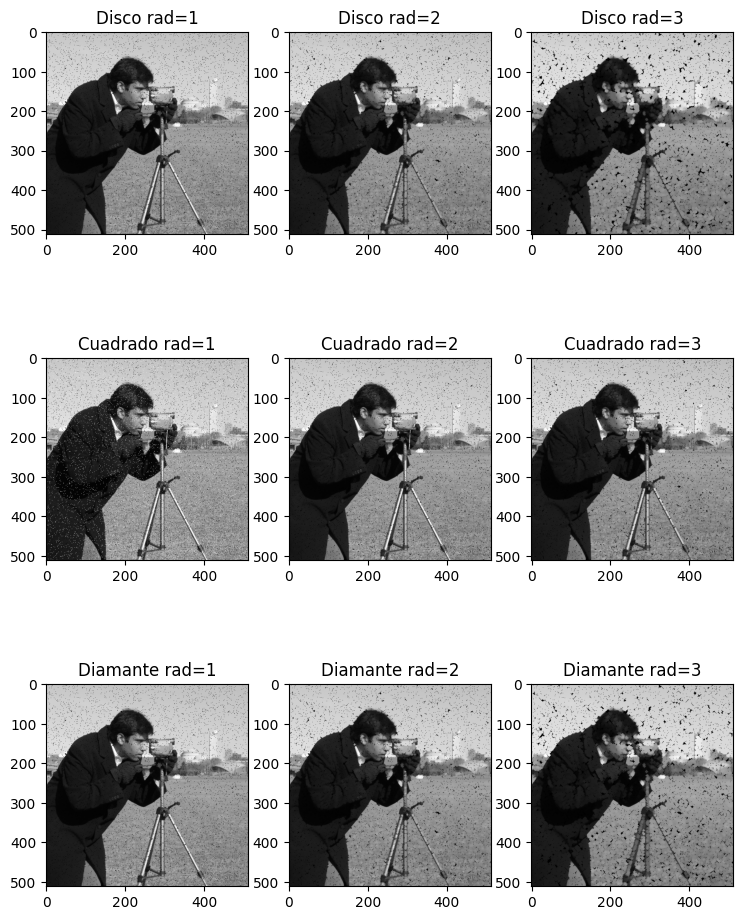

In [73]:
# Openings
def op_sequence(image, struc = None):
    if struc is None:
        return mo.opening(mo.opening(image))
    else:
        return mo.opening(mo.opening(image, footprint=struc), footprint=struc)

plt.figure(figsize=(12, 12))
plt.subplot(341)
plt.imshow(op_sequence(original_image, el_estruct[0]), cmap='gray')
plt.title('Disco rad=1')

plt.subplot(3,4,2)
plt.imshow(op_sequence(original_image, el_estruct[1]), cmap='gray')
plt.title('Disco rad=2')

plt.subplot(3,4,3)
plt.imshow(op_sequence(original_image, el_estruct[2]), cmap='gray')
plt.title('Disco rad=3')

plt.subplot(3,4,5)
plt.imshow(op_sequence(original_image, el_estruct[3]), cmap='gray')
plt.title('Cuadrado rad=1')

plt.subplot(3,4,6)
plt.imshow(op_sequence(original_image, el_estruct[4]), cmap='gray')
plt.title('Cuadrado rad=2')

plt.subplot(3,4,7)
plt.imshow(op_sequence(original_image, el_estruct[5]), cmap='gray')
plt.title('Cuadrado rad=3')

plt.subplot(3,4,9)
plt.imshow(op_sequence(original_image, el_estruct[6]), cmap='gray')
plt.title('Diamante rad=1')

plt.subplot(3,4,10)
plt.imshow(op_sequence(original_image, el_estruct[7]), cmap='gray')
plt.title('Diamante rad=2')

plt.subplot(3,4,11)
plt.imshow(op_sequence(original_image, el_estruct[8]), cmap='gray')
plt.title('Diamante rad=3')


Text(0.5, 1.0, 'Diamante rad=3')

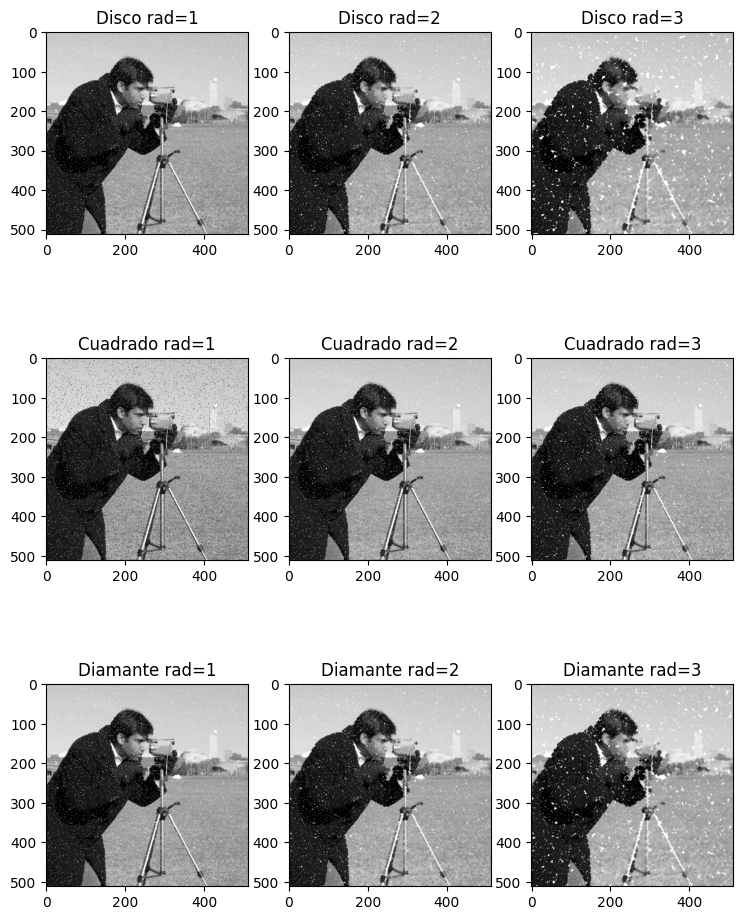

In [74]:
# Closings
def cl_sequence(image, struc = None):
    if struc is None:
        return mo.closing(mo.closing(image))
    else:
        return mo.closing(mo.closing(image, footprint=struc), footprint=struc)

plt.figure(figsize=(12, 12))
plt.subplot(341)
plt.imshow(cl_sequence(original_image, el_estruct[0]), cmap='gray')
plt.title('Disco rad=1')

plt.subplot(3,4,2)
plt.imshow(cl_sequence(original_image, el_estruct[1]), cmap='gray')
plt.title('Disco rad=2')

plt.subplot(3,4,3)
plt.imshow(cl_sequence(original_image, el_estruct[2]), cmap='gray')
plt.title('Disco rad=3')

plt.subplot(3,4,5)
plt.imshow(cl_sequence(original_image, el_estruct[3]), cmap='gray')
plt.title('Cuadrado rad=1')

plt.subplot(3,4,6)
plt.imshow(cl_sequence(original_image, el_estruct[4]), cmap='gray')
plt.title('Cuadrado rad=2')

plt.subplot(3,4,7)
plt.imshow(cl_sequence(original_image, el_estruct[5]), cmap='gray')
plt.title('Cuadrado rad=3')

plt.subplot(3,4,9)
plt.imshow(cl_sequence(original_image, el_estruct[6]), cmap='gray')
plt.title('Diamante rad=1')

plt.subplot(3,4,10)
plt.imshow(cl_sequence(original_image, el_estruct[7]), cmap='gray')
plt.title('Diamante rad=2')

plt.subplot(3,4,11)
plt.imshow(cl_sequence(original_image, el_estruct[8]), cmap='gray')
plt.title('Diamante rad=3')

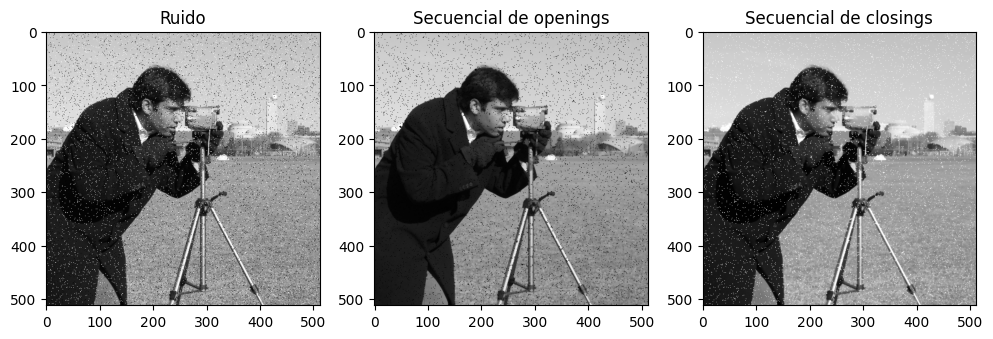

In [75]:
# Mostrar la imagen original con ruido
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Ruido')

# Aplicar el filtro secuencial de openings (erosiones seguidas de dilataciones)
opening_sequence = mo.opening(mo.opening(original_image))

# Mostrar la imagen después del filtro secuencial de openings
plt.subplot(132)
plt.imshow(opening_sequence, cmap='gray')
plt.title('Secuencial de openings')

# Aplicar el filtro secuencial de closings (dilataciones seguidas de erosiones)
closing_sequence = mo.closing(mo.closing(original_image))

plt.subplot(133)
plt.imshow(closing_sequence, cmap='gray')
plt.title('Secuencial de closings')

plt.show()

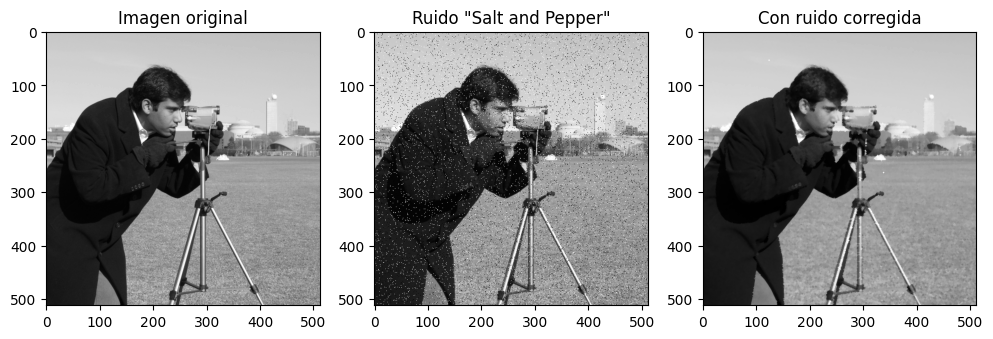

In [76]:
# Mostrar la imagen original con ruido
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(data.camera(), cmap='gray')
plt.title('Imagen original')

# Mostrar la imagen con ruido
plt.subplot(132)
plt.imshow(original_image, cmap='gray')
plt.title('Ruido "Salt and Pepper"')

# Mostrar la imagen corregida
plt.subplot(133)
plt.imshow(op_sequence(cl_sequence(original_image)), cmap='gray')
plt.title('Con ruido corregida')

plt.show()

La conclusión más directa está en el hecho de que ambos sirven para ayudar a limpiar el ruido de una imagen. En este caso, vimos que el uso secuencial de openings y closings puede mejorar la calidad de la imagen al reducir el ruido sin perder detalles importantes de los objetos en la escena. Sin embargo, es importante ajustar los parámetros de los elementos estructurantes y el número de iteraciones para obtener los mejores resultados según las características específicas del ruido y los objetos en la imagen.

## Ejercicio 5

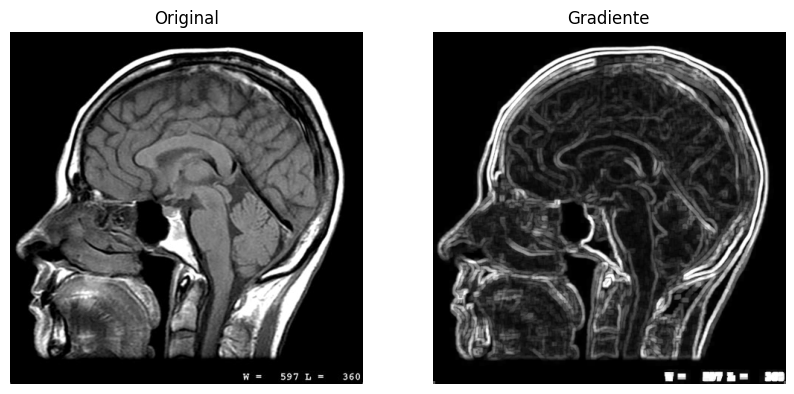

In [77]:
image = cv.imread('images/brain-scan.jpeg', cv.IMREAD_GRAYSCALE)
kernel = np.ones((5,5), np.uint8)

# Perform the morphological gradient
gradient = cv.morphologyEx(image, cv.MORPH_GRADIENT, kernel)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Gradiente')
plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()

(-0.5, 499.5, 549.5, -0.5)

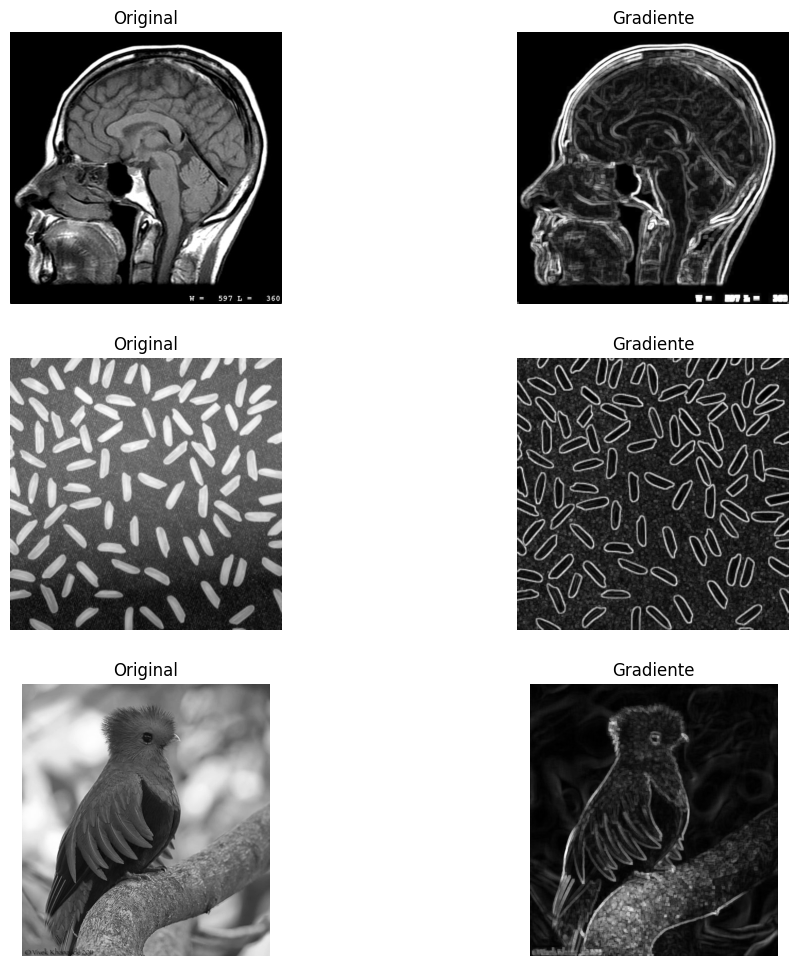

In [78]:
image1 = cv.imread('images/brain-scan.jpeg', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('images/rice.jpg', cv.IMREAD_GRAYSCALE)
image3 = cv.imread('images/quetzalgris.png', cv.IMREAD_GRAYSCALE)

# Perform the morphological gradient
gradient1 = cv.morphologyEx(image1, cv.MORPH_GRADIENT, kernel)
gradient2 = cv.morphologyEx(image2, cv.MORPH_GRADIENT, kernel)
gradient3 = cv.morphologyEx(image3, cv.MORPH_GRADIENT, kernel)
# Display the result using matplotlib
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.title('Original')
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.subplot(3,2, 2)
plt.title('Gradiente')
plt.imshow(gradient1, cmap='gray')
plt.axis('off')

plt.subplot(3,2, 3)
plt.title('Original')
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.subplot(3,2, 4)
plt.title('Gradiente')
plt.imshow(gradient2, cmap='gray')
plt.axis('off')


plt.subplot(3,2, 5)
plt.title('Original')
plt.imshow(image3, cmap='gray')
plt.axis('off')
plt.subplot(3,2, 6)
plt.title('Gradiente')
plt.imshow(gradient3, cmap='gray')
plt.axis('off')




El gradiente morfológico está resaltando los bordes de las imágenes. Se le dice gradiente porque resalta un cambio en las tonalidades de la imagen.

## Ejercicio 6

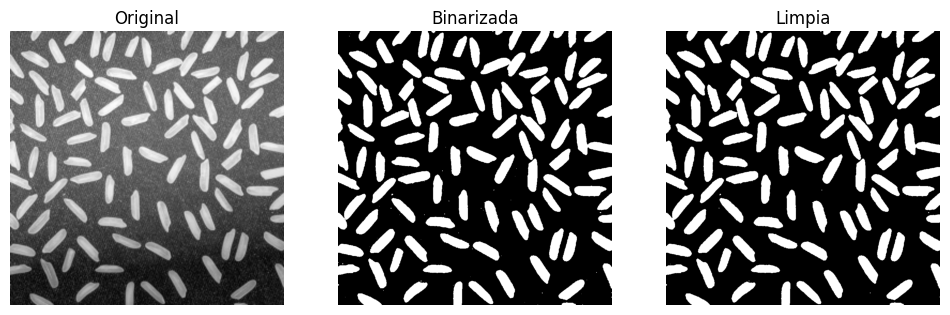

In [79]:
# Paso 1. Binarización de imagen
image_path = 'images/rice.jpg'
imagen_color = cv.imread(image_path)
imagen_gris = cv.cvtColor(imagen_color, cv.COLOR_BGR2GRAY)
ori_img_gray = imagen_gris

# Corrección con Niblack parcial
def niblack_thresholding(image, window_size, k):
    mean = cv.blur(image, (window_size, window_size))
    mean_of_squares = cv.blur(image**2, (window_size, window_size))
    std_deviation = np.sqrt(mean_of_squares - mean**2)
    threshold = mean + k * std_deviation

    binary_image = (image > threshold).astype(np.uint8) * 255

    return binary_image

k_value = 0.8

binary_image = niblack_thresholding(ori_img_gray, 200, k_value)
binary_image_clean = niblack_thresholding(op_sequence(cl_sequence(imagen_gris)), 200, k_value)

# Mostrando imagen original y binarizada tras eliminación de ruido.
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(ori_img_gray, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_image, cmap='gray')
plt.title('Binarizada')
plt.axis('off')

plt.subplot(133)
plt.imshow(binary_image_clean, cmap='gray')
plt.title('Limpia')
plt.axis('off')

plt.show()

In [80]:
labeled_image = two_pass_labeling(binary_image_clean)
n_labels = len(np.unique(labeled_image)) - 1
print(f'Cantidad de arroces encontrados [manual]: {n_labels}')

Cantidad de arroces encontrados [manual]: 108


In [81]:
contours, _ = cv.findContours(binary_image_clean, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(f'Cantidad de arroces encontrados [OpenCV]: {len(contours)}')

Cantidad de arroces encontrados [OpenCV]: 107


## Ejercicio 7

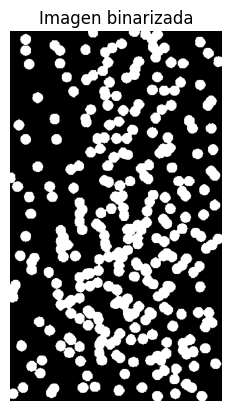

In [82]:
# Paso 1. Binarización de imagen
image_path = 'images/microscope.png'
imagen_color = cv.imread(image_path)
imagen_gris = cv.cvtColor(imagen_color, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(imagen_gris, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Mostrando imagen binarizada
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen binarizada')
plt.axis('off')
plt.show()


La componente conexa de menor tamaño es la etiqueta 2 con 158 unidades.


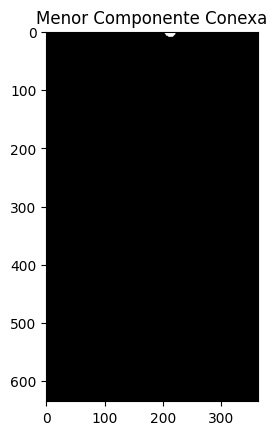

In [83]:
from utils import get_component_size

labeled_image = two_pass_labeling(binary_image)
info, image = get_component_size(labeled_image, 'small')
print(info)

plt.imshow(image, cmap='gray')
plt.title(f'Menor Componente Conexa')
plt.show()

Número de píxeles en la componente conexa de menor tamaño es: 134.5


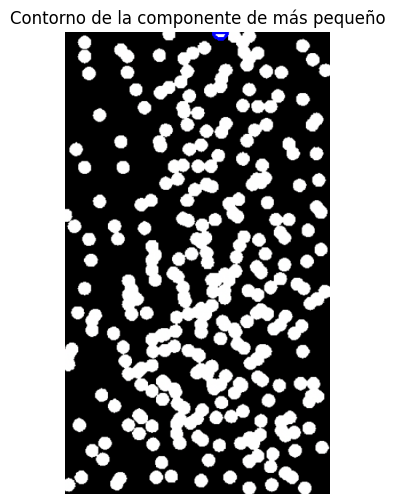

In [84]:
# Con numpy

contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

min_size = 999999999999
[min_contour := [c] for c in contours if (size := cv.contourArea(c)) < min_size and (min_size := size)]

print(f'Número de píxeles en la componente conexa de menor tamaño es: {min_size}')

highlight_image = np.copy(imagen_color)
cv.drawContours(highlight_image, min_contour, 0, (0, 0, 255), 3)

plt.figure(figsize=(12, 6))
plt.title('Contorno de la componente de más pequeño')
plt.imshow(highlight_image)
plt.axis('off')
plt.show()


La componente conexa de mayor tamaño es la etiqueta 600 con 4179 unidades.


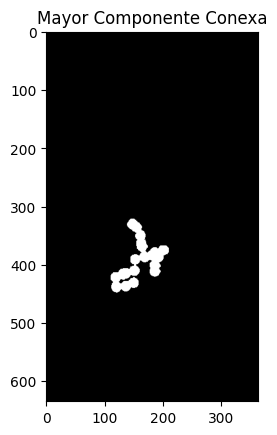

In [85]:
labeled_image = two_pass_labeling(binary_image)
info, image = get_component_size(labeled_image, 'large')
print(info)

plt.imshow(image, cmap='gray')
plt.title('Mayor Componente Conexa')
plt.show()


In [86]:
print('Número de componentes conexas [manual]:', len(np.unique(labeled_image)) - 1)
print('Número de componentes conexas [OpenCV]:', len(contours))

Número de componentes conexas [manual]: 125
Número de componentes conexas [OpenCV]: 125


Sería muy difícil conntar las células al ojo dado que son bastantes y podría haber una confusión entre si son una sola o varias. Por tanto, es que se usó la libreria de OpenCV para tener una métrica de cuantas células son en total y podemos ver que se contó la misma cantidad con el algoritmo de doble pasada implementado que con la función de OpenCV.

## Ejercicio 8

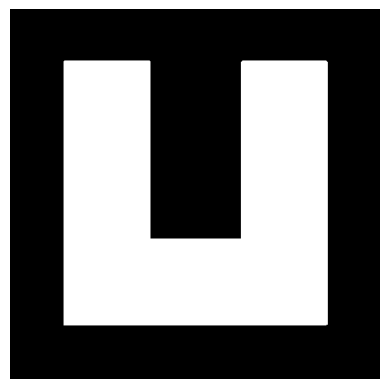

In [87]:
image_path = 'images/ej8.png'
imagen_color = cv.imread(image_path)
imagen_gris = cv.cvtColor(imagen_color, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(imagen_gris, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

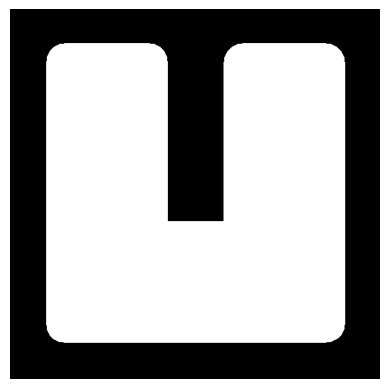

In [88]:
r = 25
di = mp.disk(r)
disk_dilation = mp.dilation(binary_image, di)

plt.imshow(disk_dilation, cmap='gray')
plt.axis('off')
plt.show()


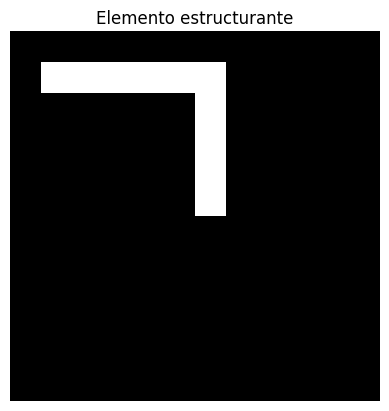

In [89]:
def frame(r):
    x = np.zeros((r, r)).astype(int)
    x[:r // 2, r // 2] = 1
    x[0, :r // 2] = 1

    x = np.pad(x, [1, 1])
    return x

plt.imshow(frame(10), cmap='gray')
plt.axis('off')
plt.title('Elemento estructurante')
plt.show()

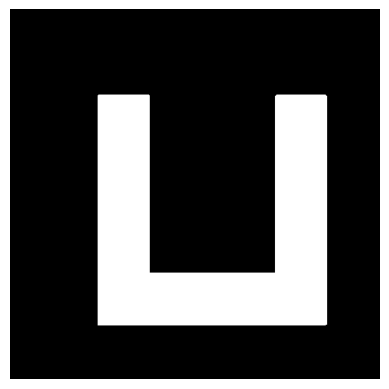

In [90]:
r = 100
fr = frame(r)
frame_erosion = mp.erosion(binary_image, fr)

plt.imshow(frame_erosion, cmap='gray')
plt.axis('off')
plt.show()

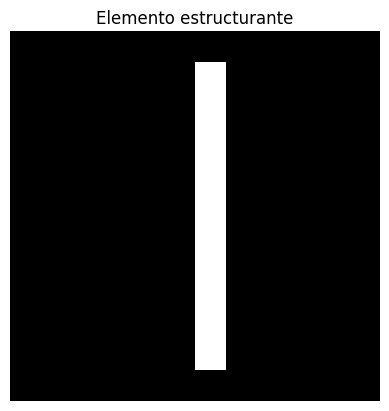

In [91]:
def frame(r):
    x = np.zeros((r, r)).astype(int)
    for i in range(r): x[i , r // 2] = 1
    x = np.pad(x, [1, 1])
    return x

plt.imshow(frame(10), cmap='gray')
plt.title('Elemento estructurante')
plt.axis('off')
plt.show()

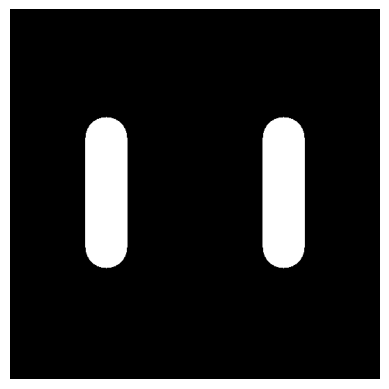

In [92]:
r = 100
fr = frame(r)
frame_erosion = mp.erosion(binary_image, fr)

r = 62
di = mp.disk(r)
disk_erosion = mp.erosion(frame_erosion, di)

r = 30 
di = mp.disk(r)
disk_dilation = mp.dilation(disk_erosion, di)

plt.imshow(disk_dilation, cmap='gray')
plt.axis('off')
plt.show()

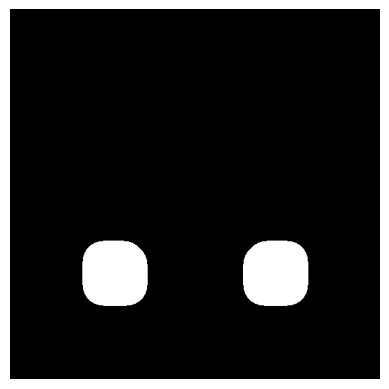

In [93]:
r = 72
di = mp.disk(r)
disk_erosion = mp.erosion(binary_image, di)

r = 30 
di = mp.disk(r)
disk_dilation = mp.dilation(disk_erosion, di)

r = 30
sq = mp.square(r)
square_dilation = mp.dilation(disk_dilation, sq)

plt.imshow(square_dilation, cmap='gray')
plt.axis('off')
plt.show()